In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df = pd.read_csv(r"TrainingSet\statsTrainingSet.csv")
df.head()

,id,red,green,blue,black,white,doble(1:yes 0:no)
0,01 52 16.03 -12 59 18.8,4739,188,5425,3797453,9920,1
1,107.5 -11.13,12543,192,277,995442,10124,0
2,05 48 49.50 +72 33 31.3,715,180,2713,1018471,2111,1
3,209.41 -3.58,118,177,288,1016827,1168,0
4,00 39 33.55 +14 54 19.0,1424,181,1571,1020672,342,1


In [71]:
df = df.dropna(1)
red = df['red']
green = df['green']
blue = df['blue']
black = df['black']
white = df['white']

f = lambda x, y: x+y
red = f(red, green)
red = f(red, blue)
red = f(red, black)
red = f(red, white)

f = lambda x, y: (x/y)*100
df['%red'] = f(df['red'],red)
df['%green'] = f(df['green'],red)
df['%blue'] = f(df['blue'],red)
df['%black'] = f(df['black'],red)
df['%white'] = f(df['white'],red)
df.head()

,id,red,green,blue,black,white,doble(1:yes 0:no),%red,%green,%blue,%black,%white
0,01 52 16.03 -12 59 18.8,4739,188,5425,3797453,9920,1,0.124132,0.004924,0.142100,99.469003,0.259841
1,107.5 -11.13,12543,192,277,995442,10124,0,1.231423,0.018850,0.027195,97.728598,0.993935
2,05 48 49.50 +72 33 31.3,715,180,2713,1018471,2111,1,0.069811,0.017575,0.264892,99.441608,0.206114
3,209.41 -3.58,118,177,288,1016827,1168,0,0.011585,0.017377,0.028275,99.828094,0.114670
4,00 39 33.55 +14 54 19.0,1424,181,1571,1020672,342,1,0.139037,0.017673,0.153390,99.656509,0.033392


In [72]:
df.pop('id')
df.pop('red')
df.pop('green')
df.pop('blue')
df.pop('black')
df.pop('white')

0        9920
1       10124
2        2111
3        1168
4         342
5        3291
6       14102
7         653
8       52479
9       13246
10       5098
11       2682
12       3201
13       3242
14       9422
15      10559
16       4298
17       4592
18       4537
19       5420
20       9233
21       2398
22       3452
23       1209
24       2094
25       2773
26       7391
27       1507
28       8682
29       2275
        ...  
1638     3909
1639    19616
1640     3237
1641     3285
1642     9759
1643    26829
1644    14624
1645     3121
1646     1823
1647     3869
1648     9385
1649     4556
1650     3856
1651      195
1652     2932
1653    19036
1654      611
1655      503
1656     4588
1657     7945
1658     7181
1659     9583
1660     8763
1661     1734
1662     2064
1663    40409
1664       21
1665     5598
1666     6998
1667     1667
Name: white, Length: 1668, dtype: int64

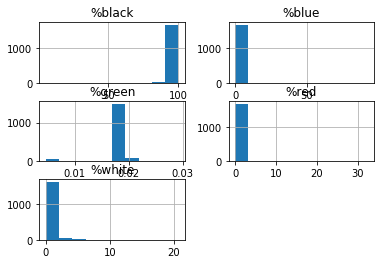

In [73]:
df.drop(['doble(1:yes 0:no)'],1).hist()
plt.show()

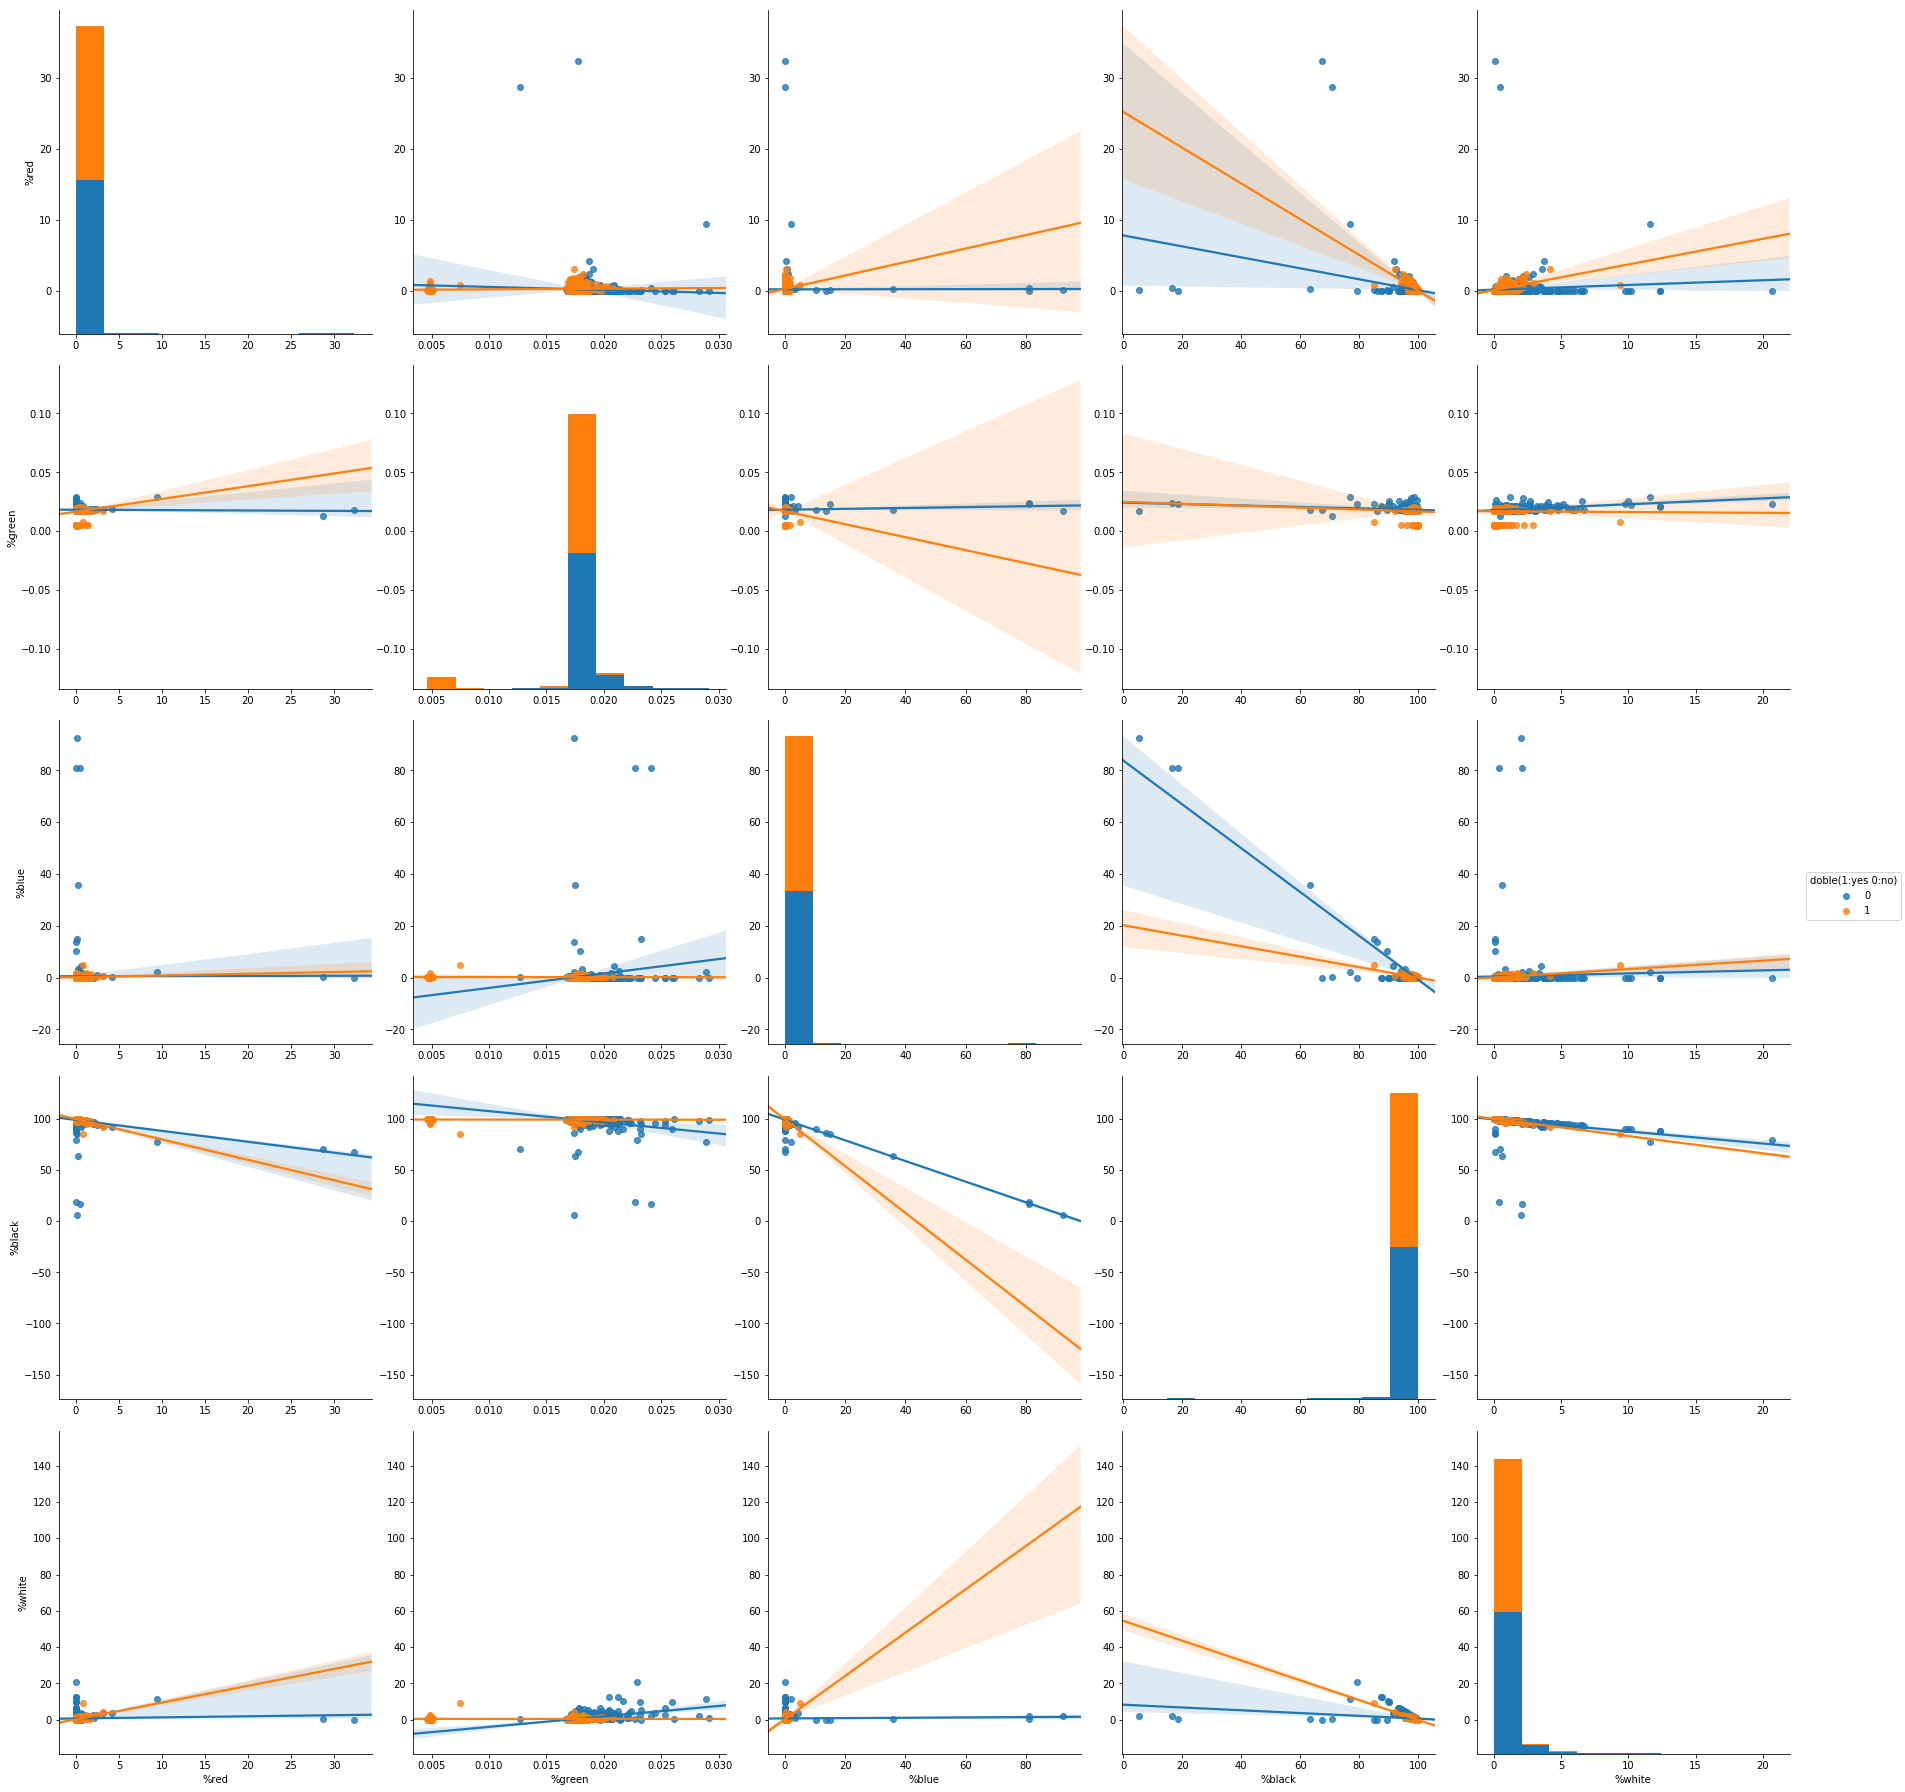

In [74]:
sb.pairplot(df.dropna(), hue='doble(1:yes 0:no)',size=5,vars=["%red","%green","%blue","%black","%white"],kind='reg')

In [76]:
X = np.array(df.drop(['doble(1:yes 0:no)'],1))
y = np.array(df['doble(1:yes 0:no)'])
model = linear_model.LogisticRegression()
model.fit(X,y)
model.score(X,y)

0.56774580335731417